In [1]:
import re
import pandas as pd
import os
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
from wordcloud import STOPWORDS 

In [2]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [2]:
ctr = 0
file = open(r"data/Twitter_Data.csv", encoding = "ISO-8859-1")
total = len(file.readlines())
print(total)

40746


In [3]:
# Remove non ascii characters
def clean_nonascii(text):
    return text.encode("ascii",errors="ignore").decode()

# Replce punctuations with whitespace
def clean_punc(text):
    return (text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))
def clean_ws(text):
    return (' '.join(text.split()))

# Case folding
def clean_case(text):
    return text.lower()

# Remove stopwords
def clean_stopwords(text):
    setstopwords = set(stopwords.words('english'))
    return " ".join(word for word in text.split() if word not in setstopwords)

# Lemmatize words
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J":wordnet.ADJ,
                "N":wordnet.NOUN,
                "V":wordnet.VERB,
                "R":wordnet.ADV}
    #default is noun
    return tag_dict.get(tag, wordnet.NOUN)

def dolemma(text):
    global ctr
    global total
#     print(ctr)
    ctr = ctr + 1
    sys.stdout.write('\r')
    sys.stdout.write('Processing %d/%d' % (ctr, total))
    
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_list])
    return lemmatized_output

In [4]:
# Combine all routines
def cleandf(df):
    df['Text'] = df[['Text']].apply(lambda row: clean_case(str(row['Text'])), axis=1)
    df['Text'] = df[['Text']].apply(lambda row: clean_nonascii(str(row['Text'])), axis=1)
    df['Text'] = df[['Text']].apply(lambda row: clean_punc(row['Text']), axis=1)
    df['Text'] = df[['Text']].apply(lambda row: clean_ws(row['Text']), axis=1)
    df['Text'] = df[['Text']].apply(lambda row: clean_stopwords(row['Text']), axis=1)
    df['Text'] = df[['Text']].apply(lambda row: dolemma(row['Text']), axis=1)
    return df

In [5]:
%%time
#Step 1: Load the file into memory
df = pd.read_csv(r"data/Twitter_Data.csv",encoding = "ISO-8859-1")

#Step 2: Clean the data
df = cleandf(df)

#Step 3: Save the data
df.to_csv('data/cleanData.csv', index=False)

Processing 34423/40746Wall time: 7min 46s


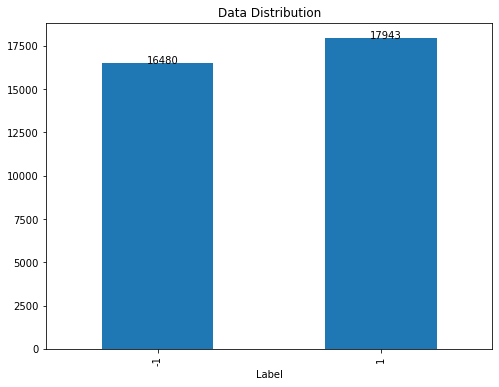

In [6]:
fig = plt.figure(figsize=(8,6))
graph = df.groupby('Label').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()))
graph.set_title('Data Distribution') 
plt.show()

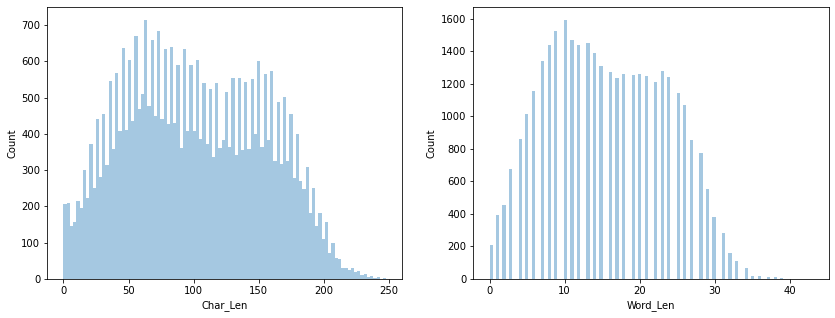

In [10]:
df['Char_Len'] = df['Text'].astype(str).apply(len)
df['Word_Len'] = df['Text'].apply(lambda row: len(str(row).split()))
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].set(xlabel="Char Length", ylabel="Count")
ax[1].set(xlabel="Word Length", ylabel="Count")
sns.distplot(df['Char_Len'], 
             hist=True, 
             kde=False, 
             bins=100, 
             ax=ax[0])
sns.distplot(df['Word_Len'], 
             hist=True, 
             kde=False, 
             bins=100,
             ax=ax[1])

# Top Words

In [11]:
positive = df.loc[df["Label"]==1,:]
negative = df.loc[df['Label']==-1,:]

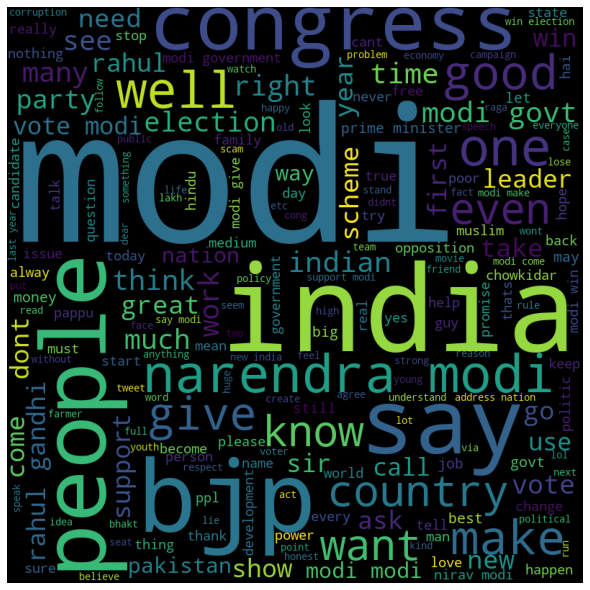

In [12]:
comment_words = ' '
stopwords = set(STOPWORDS) 

words_positive = []

for val in positive.Text: 
    tokens = str(val).split() 
    words_positive = words_positive + tokens
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

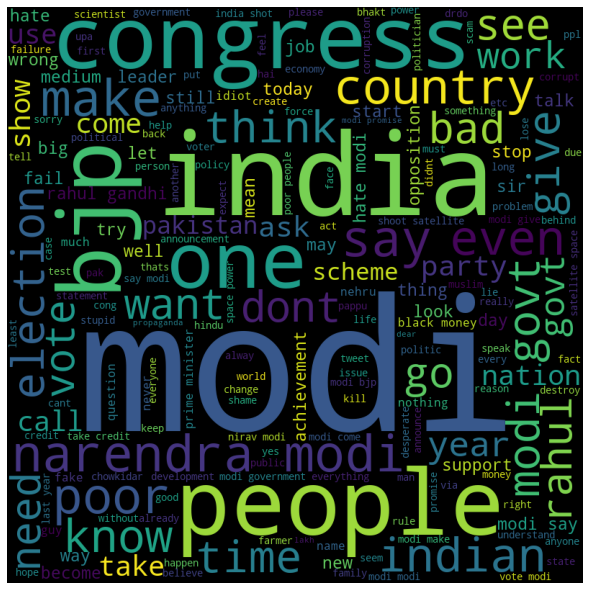

In [13]:
comment_words = ' '
stopwords = set(STOPWORDS) 

words_negative = []

for val in negative.Text: 
    tokens = str(val).split() 
    words_negative = words_negative + tokens
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()